In [1]:
import newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns

## Load & clean data

In [2]:
data = newsgroups.load()

In [3]:
data.head()

,text,group
0,morgan and guzman will have era's 1 run higher...,rec.sport.baseball
1,"Well, I just got my Centris 610 yesterday. It...",comp.sys.mac.hardware
2,History and classical methods. Modern methods....,sci.crypt
3,ATTENTION: Mac Quadra owners: Many storage ind...,comp.sys.mac.hardware
4,To show that the examples I and others have pr...,alt.atheism


## Split data into train and test set

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.group)

In [5]:
print("Train:", train.shape, "\nTest:", test.shape)

Train: (15076, 2) 
Test: (3770, 2)


### Check label distribution

In [6]:
train.group.value_counts()

rec.sport.hockey            799
soc.religion.christian      798
rec.motorcycles             797
rec.sport.baseball          795
sci.crypt                   793
sci.med                     792
rec.autos                   792
comp.windows.x              790
sci.space                   790
comp.os.ms-windows.misc     788
sci.electronics             787
comp.sys.ibm.pc.hardware    786
misc.forsale                780
comp.graphics               778
comp.sys.mac.hardware       770
talk.politics.mideast       752
talk.politics.guns          728
alt.atheism                 639
talk.politics.misc          620
talk.religion.misc          502
Name: group, dtype: int64

In [7]:
test.group.value_counts()

rec.sport.hockey            200
rec.motorcycles             199
rec.sport.baseball          199
soc.religion.christian      199
rec.autos                   198
sci.crypt                   198
sci.med                     198
comp.windows.x              198
sci.space                   197
comp.os.ms-windows.misc     197
sci.electronics             197
comp.sys.ibm.pc.hardware    196
misc.forsale                195
comp.graphics               195
comp.sys.mac.hardware       193
talk.politics.mideast       188
talk.politics.guns          182
alt.atheism                 160
talk.politics.misc          155
talk.religion.misc          126
Name: group, dtype: int64

## Encoding with TF-IDF

In [8]:
tfidf = TfidfVectorizer(max_features=10000).fit(train.text)

In [9]:
keys = sorted((key, token) for token, key in tfidf.vocabulary_.items())
keys[1000:1015]

[(1000, 'answering'),
 (1001, 'answers'),
 (1002, 'antenna'),
 (1003, 'anthony'),
 (1004, 'anti'),
 (1005, 'antibiotic'),
 (1006, 'antibiotics'),
 (1007, 'any'),
 (1008, 'anybody'),
 (1009, 'anyhow'),
 (1010, 'anymore'),
 (1011, 'anyone'),
 (1012, 'anything'),
 (1013, 'anytime'),
 (1014, 'anyway')]

### Encoding train and test set

In [10]:
X_train = tfidf.transform(train.text).toarray()
print('X_train shape: %s' % (X_train.shape,))

X_test = tfidf.transform(test.text).toarray()
print('X_test shape: %s' % (X_test.shape,))

X_train shape: (15076, 10000)
X_test shape: (3770, 10000)


## Prepare labels

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(train.group)

In [12]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [13]:
Y_train = label_encoder.transform(train.group)
print('Y_train shape: %s' % (Y_train.shape,))

Y_test = label_encoder.transform(test.group)
print('Y_test shape: %s' % (Y_test.shape,))

Y_train shape: (15076,)
Y_test shape: (3770,)


## Train Naive Bayes classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, Y_train)

In [15]:
def show_report(Y, Y_hat, target_names, show_confusion_matrix=True):
  print("Classification report:")
  print(classification_report(Y, Y_hat, target_names=target_names))
  
  if(show_confusion_matrix):
    print("Confusion matrix:")
    cm = confusion_matrix(Y, Y_hat)
    sns.heatmap(cm, cmap="RdBu_r")

### Train set classification report

In [16]:
show_report(Y_train, clf.predict(X_train), target_names=label_encoder.classes_, show_confusion_matrix=False)

Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.72      0.79       639
           comp.graphics       0.84      0.85      0.85       778
 comp.os.ms-windows.misc       0.83      0.86      0.85       788
comp.sys.ibm.pc.hardware       0.79      0.88      0.83       786
   comp.sys.mac.hardware       0.92      0.89      0.91       770
          comp.windows.x       0.92      0.88      0.90       790
            misc.forsale       0.90      0.80      0.85       780
               rec.autos       0.91      0.94      0.92       792
         rec.motorcycles       0.96      0.95      0.96       797
      rec.sport.baseball       0.96      0.97      0.97       795
        rec.sport.hockey       0.94      0.98      0.96       799
               sci.crypt       0.91      0.95      0.93       793
         sci.electronics       0.88      0.84      0.86       787
                 sci.med       0.94      0.95      0

### Test set classification report

Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.58      0.67       160
           comp.graphics       0.72      0.79      0.76       195
 comp.os.ms-windows.misc       0.77      0.77      0.77       197
comp.sys.ibm.pc.hardware       0.69      0.79      0.73       196
   comp.sys.mac.hardware       0.85      0.77      0.81       193
          comp.windows.x       0.84      0.82      0.83       198
            misc.forsale       0.89      0.75      0.81       195
               rec.autos       0.87      0.86      0.86       198
         rec.motorcycles       0.88      0.90      0.89       199
      rec.sport.baseball       0.95      0.95      0.95       199
        rec.sport.hockey       0.93      0.93      0.93       200
               sci.crypt       0.85      0.91      0.88       198
         sci.electronics       0.82      0.77      0.79       197
                 sci.med       0.94      0.88      0

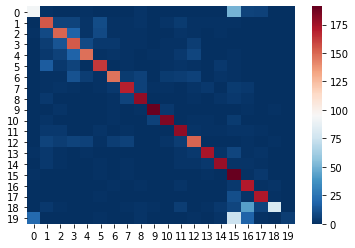

In [17]:
show_report(Y_test, clf.predict(X_test), target_names=label_encoder.classes_)

## Train MLPClassifier

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(50,), random_state=42, early_stopping=True)

In [20]:
clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [21]:
print(classification_report(Y_test, clf.predict(X_test), target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.83      0.83       160
           comp.graphics       0.82      0.88      0.85       195
 comp.os.ms-windows.misc       0.81      0.84      0.83       197
comp.sys.ibm.pc.hardware       0.81      0.77      0.79       196
   comp.sys.mac.hardware       0.86      0.82      0.84       193
          comp.windows.x       0.84      0.87      0.86       198
            misc.forsale       0.85      0.85      0.85       195
               rec.autos       0.89      0.89      0.89       198
         rec.motorcycles       0.94      0.91      0.92       199
      rec.sport.baseball       0.94      0.97      0.95       199
        rec.sport.hockey       0.99      0.92      0.96       200
               sci.crypt       0.96      0.93      0.95       198
         sci.electronics       0.84      0.87      0.86       197
                 sci.med       0.92      0.92      0.92       198
         

## Train Neural Net

In [22]:
Y_train_e = OneHotEncoder().fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_train_e.shape

(15076, 20)

In [23]:
from CustomNeuralNet import NeuralNet

In [26]:
nn = NeuralNet([X_train.shape[1], 50, Y_train_e.shape[1]], normalize=True, learning_rate=0.1,
               num_iter=50, mini_batch_size=2048, activation="sigmoid")

(50, 10000)
(20, 50)


D:\USERS\Buhrii_B\Machine Learning\lnu\_Machine_Learning-LNU\Text Classification\CustomNeuralNet.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Cost after iteration 0: 0.149395
Cost after iteration 10: 0.143492
Cost after iteration 20: 0.121293
Cost after iteration 30: 0.085067
Cost after iteration 40: 0.058996


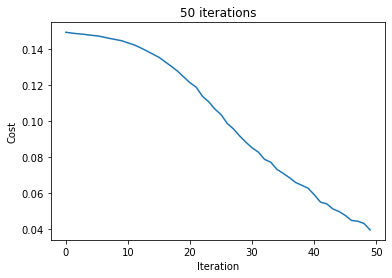

In [27]:
nn.fit(X_train, Y_train_e)

In [28]:
show_report(Y_train, nn.predict(X_train), target_names=label_encoder.classes_, show_confusion_matrix=False)

Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.81      0.82       639
           comp.graphics       0.81      0.84      0.82       778
 comp.os.ms-windows.misc       0.83      0.86      0.85       788
comp.sys.ibm.pc.hardware       0.86      0.86      0.86       786
   comp.sys.mac.hardware       0.92      0.89      0.90       770
          comp.windows.x       0.89      0.92      0.91       790
            misc.forsale       0.89      0.84      0.87       780
               rec.autos       0.92      0.95      0.93       792
         rec.motorcycles       0.94      0.95      0.94       797
      rec.sport.baseball       0.94      0.97      0.96       795
        rec.sport.hockey       0.97      0.98      0.97       799
               sci.crypt       0.94      0.94      0.94       793
         sci.electronics       0.89      0.89      0.89       787
                 sci.med       0.93      0.93      0

Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.63      0.59      0.61       160
           comp.graphics       0.54      0.55      0.55       195
 comp.os.ms-windows.misc       0.56      0.63      0.60       197
comp.sys.ibm.pc.hardware       0.63      0.57      0.60       196
   comp.sys.mac.hardware       0.65      0.62      0.63       193
          comp.windows.x       0.68      0.66      0.67       198
            misc.forsale       0.66      0.50      0.57       195
               rec.autos       0.73      0.68      0.70       198
         rec.motorcycles       0.69      0.80      0.74       199
      rec.sport.baseball       0.89      0.88      0.89       199
        rec.sport.hockey       0.78      0.89      0.83       200
               sci.crypt       0.77      0.84      0.80       198
         sci.electronics       0.65      0.65      0.65       197
                 sci.med       0.76      0.76      0

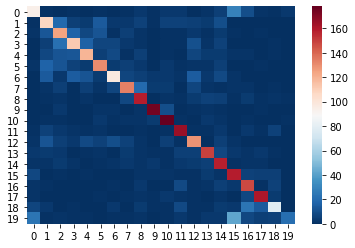

In [29]:
show_report(Y_test, nn.predict(X_test), target_names=label_encoder.classes_)